In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
def img_preprocess(img_path):
    img = cv2.imread(img_path)
        if img is None:
        raise FileNotFoundError(f"Image file not found at: {img_path}")

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    ret, th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th

In [4]:
def text(img_path):
    img = img_preprocess(img_path)
    txt = pytesseract.image_to_string(img)
    return txt

In [5]:
def create_data_structure(text):
    data_dict = {}
    lines = text.split('\n')
    for line in lines:
        if ':' in line:
            key, value = map(str.strip, line.split(':', 1))
            data_dict[key] = value
    return data_dict

In [6]:
def display_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Processed ID Card Image')
    plt.axis('off')
    plt.show()

Enter the path of the ID card image: ../imgs/ID1.jpg


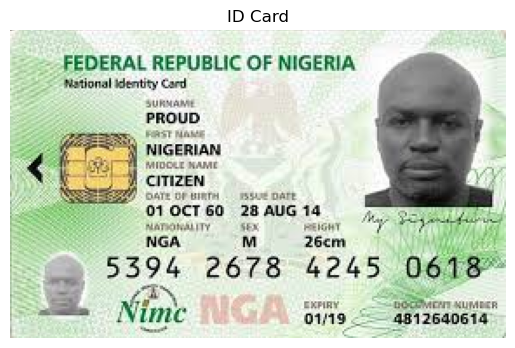

Extracted Text:
FEDERAL REPUBLIC OF taGERA

~ ad
5394 2678 4245 0618

Ih sii

~~.
Prretry


Extracted Data:
Do you want to add another card? (yes/no): yes
Enter the path of the ID card image: ../imgs/ID2.jpg


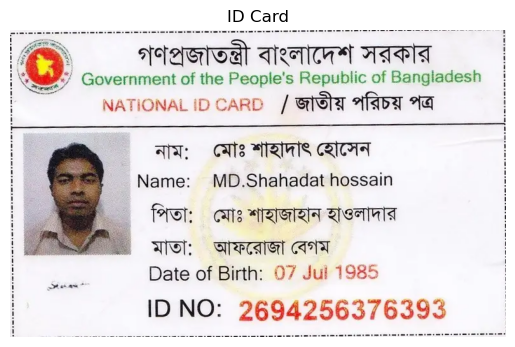

Extracted Text:
©:

Government of the People’s Republic ot Bangladesh

NATIONALID CARL / @rehr ofaoa ma

ATA: CUTS MTRTATS CROAT
Name: MD.Shahadat hossain

Pret: ans TSTIA Borns

ATS: STC CTT

Date of Birth: 97 Jul 1985

ID NO: 2694256376393


Extracted Data:
©: 
ATA: CUTS MTRTATS CROAT
Name: MD.Shahadat hossain
Pret: ans TSTIA Borns
ATS: STC CTT
Date of Birth: 97 Jul 1985
ID NO: 2694256376393
Do you want to add another card? (yes/no): yes
Enter the path of the ID card image: ../imgs/ID3.jpg


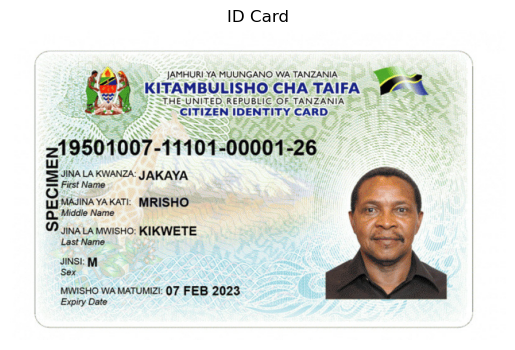

Extracted Text:
THE UNITED REPUBLIC OF TANZANIA
CITIZEN IDENTITY CARD

JAMMURI YA HUUNGANO WA TANZANIA ¢
§* KITAMBULISHO CHA TAIFA # ©
f

zi 9501007-11101-00001-26

= me KWANZA JAKAYA

Wun aru! MRISHO
Q, Mddte Nene
D sucrunsno KIKWETE
Last Name
Just
Sex

MNISHO WA MATUMIZ] O7 FEB 2023
Expey Cote


Extracted Data:
Do you want to add another card? (yes/no): no


In [7]:
def main():
    process_another_card = True

    while process_another_card:
        img_path = input('Enter the path of the ID card image: ')

        try:
            img = img_preprocess(img_path)
            txt = text(img_path)
            df = create_data_structure(txt)

            plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
            plt.title('ID Card')
            plt.axis('off')
            plt.show()

            print("Extracted Text:")
            print(txt)

            print("Extracted Data:")
            for key, value in df.items():
                print(f"{key}: {value}")

        except Exception as e:
            print(f"An error occurred: {e}")

        another_card = input('Do you want to add another card? (yes/no): ')
        if another_card.lower() != 'yes':
            process_another_card = False

if __name__ == "__main__":
    main()

In [ ]:
../imgs/ID1.jpg